### Figure 10. Khatri–Rao test matrices: Estimating a partition function.  
Relative error  
$$
\frac{|Z(\beta) - \widehat{Z}(\beta)|}{Z(\beta)}
$$
of estimates $\widehat{Z}(\beta)$ of the partition function  
$$
Z(\beta) = \mathrm{tr}\!\left(\exp(-\beta \mathbf{H})\right)
$$
computed using several stochastic trace estimators with Khatri–Rao test matrices of tensor order $\ell = 16$.  

We investigate three values of the inverse temperature $\beta$. The data markers track the median of 30 trials, and shaded regions are bounded by the 10% and 90% quantiles.

---

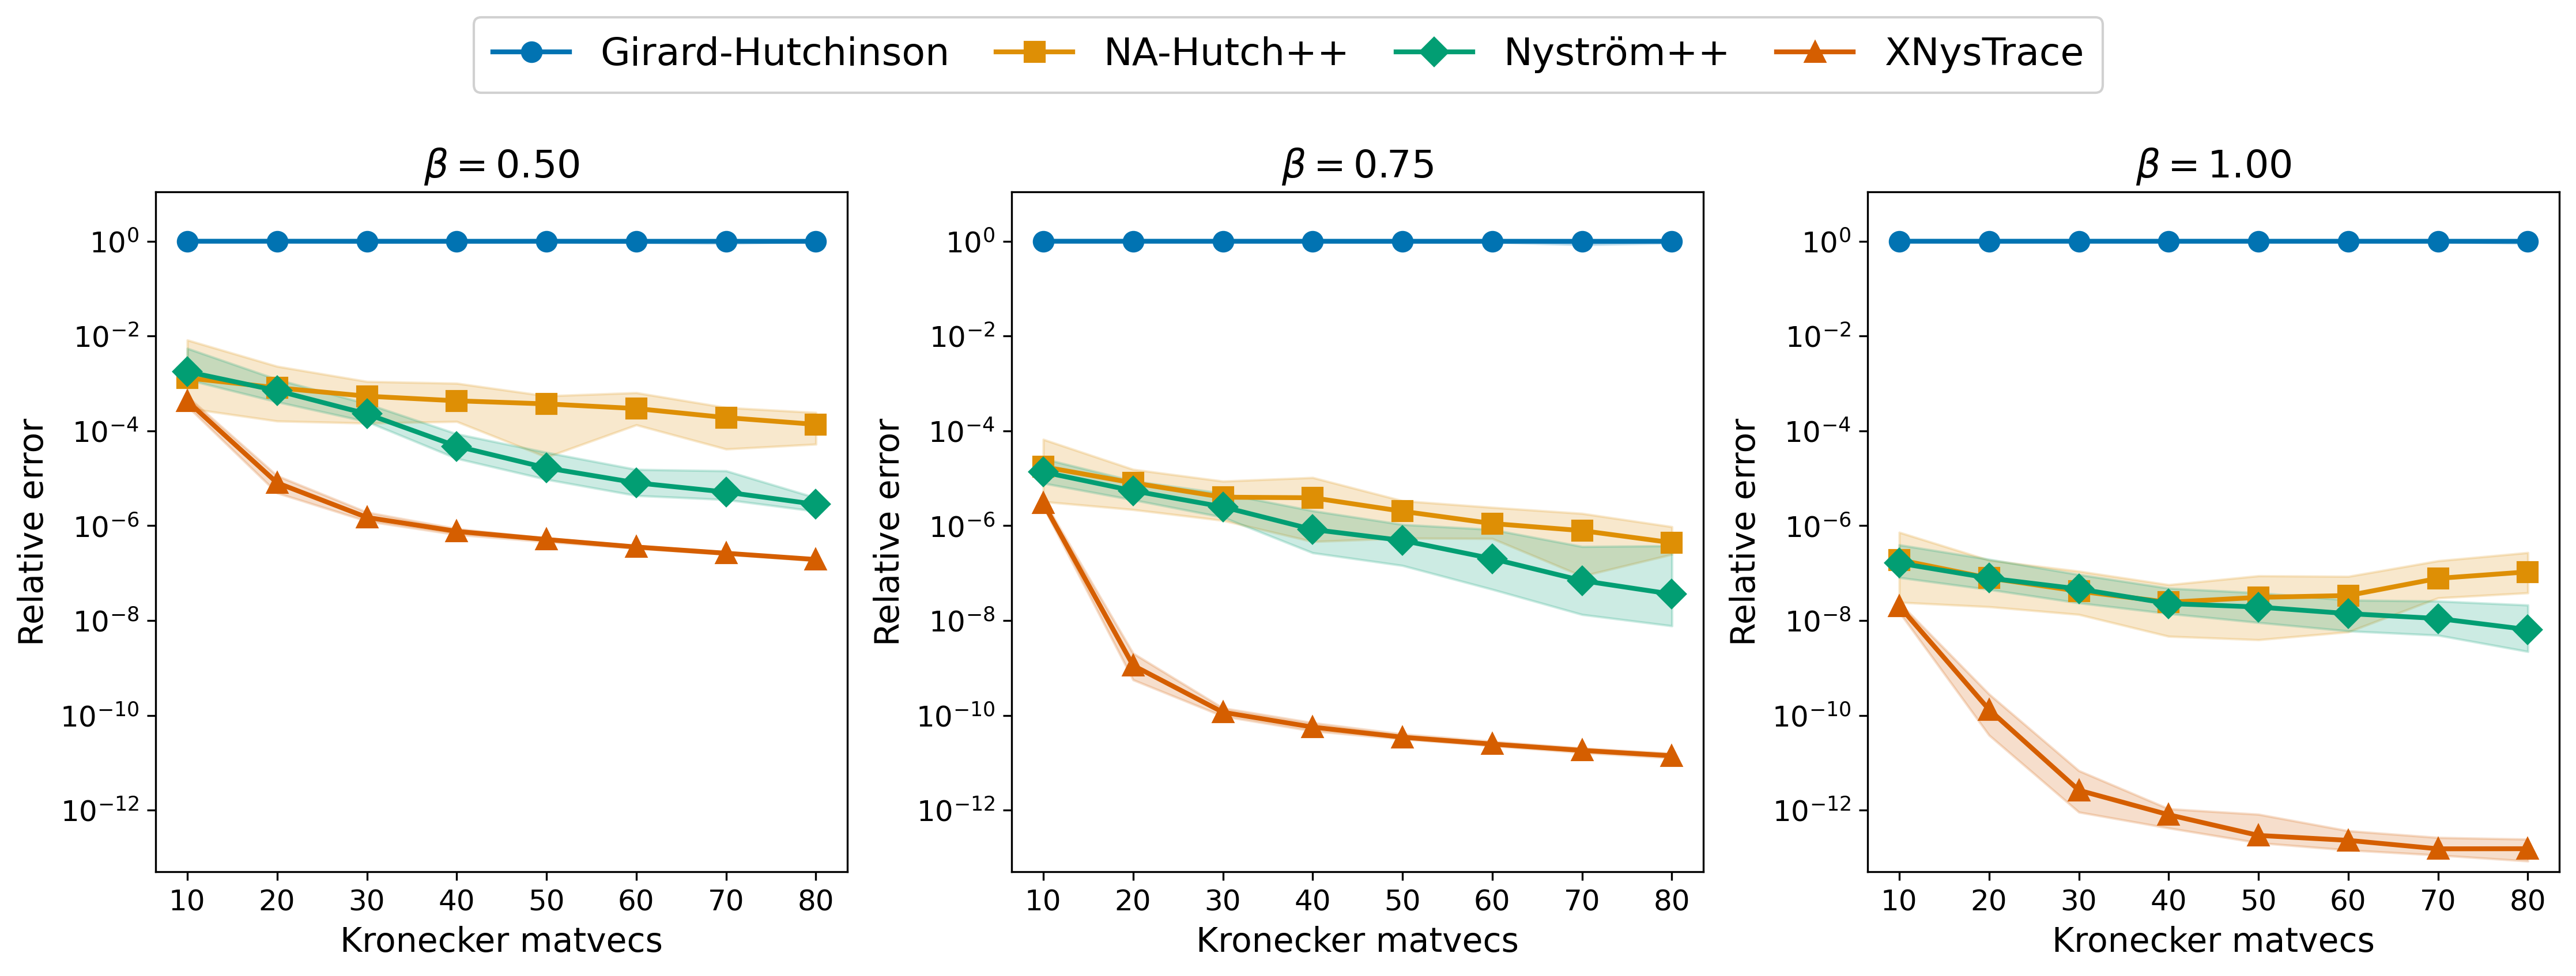

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def plot_trace_error_kr_multiple_beta(matfile='trace_data_multiple_beta.mat',
                                      marker_size=8):
    """
    Plot KR-only trace-error curves for each beta in a 1×B multiplot,
    using the Mako colorblind palette for the four methods.
    """
    # Load data
    data        = scipy.io.loadmat(matfile)
    beta_levels = data['beta_levels'].flatten()
    m_vals      = data['m_vals'].flatten()
    errs_full   = data['errs']  

    B, runs, M, _ = errs_full.shape

    kr_indices = [1, 3, 0, 2]
    labels     = ['Girard-Hutchinson','NA-Hutch++', 'Nyström++', 'XNysTrace',]

    errs_kr = errs_full[..., kr_indices]
    p10 = np.percentile(errs_kr, 10, axis=1)
    med = np.percentile(errs_kr, 50, axis=1)
    p90 = np.percentile(errs_kr, 90, axis=1)

    all_vals = np.concatenate([p10.flatten(), p90.flatten()])
    ymin, ymax = all_vals.min(), all_vals.max()

    colors = sns.color_palette("colorblind", n_colors=len(labels))
    markers = ['o', 's', 'D', '^']

    fig, axes = plt.subplots(1, B,
                             figsize=(5*B, 5),
                             dpi=300,
                             sharex=True,
                             sharey=False)
    if B == 1:
        axes = [axes]

    for bi, beta in enumerate(beta_levels):
        ax = axes[bi]
        for j in range(len(labels)):
            ax.plot(
                m_vals,
                med[bi, :, j],
                marker=markers[j],
                markersize=marker_size,
                linestyle='-',
                linewidth=2,
                color=colors[j],
            )
            ax.fill_between(
                m_vals,
                p10[bi, :, j],
                p90[bi, :, j],
                color=colors[j],
                alpha=0.2
            )

        # ax.set_xscale('log')
        xticks = np.arange(10, int(m_vals.max())+1, 10)
        ax.set_xticks(xticks)
        ax.set_xticklabels([str(x) for x in xticks], fontsize=12)
    
        ax.set_yscale('log')
        ax.set_ylim([5e-14, ymax+10])
        ax.set_title(rf'$\beta={beta:.2f}$', fontsize=16)
        ax.set_xlabel(r'Kronecker matvecs', fontsize=14)
        ax.set_ylabel('Relative error', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

    handles = [
        Line2D([], [], color=colors[i], marker=markers[i],
               linestyle='-', linewidth=2, markersize=marker_size,
               label=labels[i])
        for i in range(len(labels))
    ]
    fig.legend(handles=handles,
               ncol=4,
               frameon=True,
               fontsize=16,
               columnspacing=1.2,
               bbox_to_anchor=(0.5, 1.01),
               loc='lower center',
               borderpad=0.5,
               framealpha=0.9)

    fig.subplots_adjust(top=0.85,
                        bottom=0.12,
                        left=0.05,
                        right=0.98,
                        wspace=0.3)
    plt.tight_layout()
    plt.savefig("trace_kr_multiple_beta2.png", dpi=300, bbox_inches="tight")
    plt.show()
plot_trace_error_kr_multiple_beta("data/trace_data_multiple_beta.mat")
